In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from util.TSB_AD.metrics import metricor
from util.TSB_AD.slidingWindows import find_length #,plotFig, printResult
from sklearn.preprocessing import MinMaxScaler
import os
import sys
import copy

from util.plot_andri import *
from util.util_andri import *
from util.util_exp import *

# from scipy.io import arff
import arff

# from tqdm.notebook import tqdm
import time
import math
# from util.TranAD_base import *
# from util.TSB_AD.models.norma import NORMA
from util.TSB_AD.models.andri import AnDri
# from util.TSB_AD.models.sand import SAND
# from util.TSB_AD.models.damp import DAMP
import warnings
warnings.filterwarnings('ignore')
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown', 'tab:olive', 'tab:pink', 'tab:cyan', 'tab:gray', 
          'blue', 'orange', 'green', 'purple','brown', 'gold', 'violet', 'cyan', 'pink', 'deepskyblue', 'lawngreen',
          'royalblue', 'darkgrey', 'darkorange', 'darkgreen','darkviolet','salmon','olivedrab','lightcoral','darkcyan','yellowgreen']
markers = ['o', 'x', '^', 'v', 's', '*', '+', '.', ',', '<', '>' , '1','2','3','4','p','h','H','D','d']

### Load dataset: check filder path

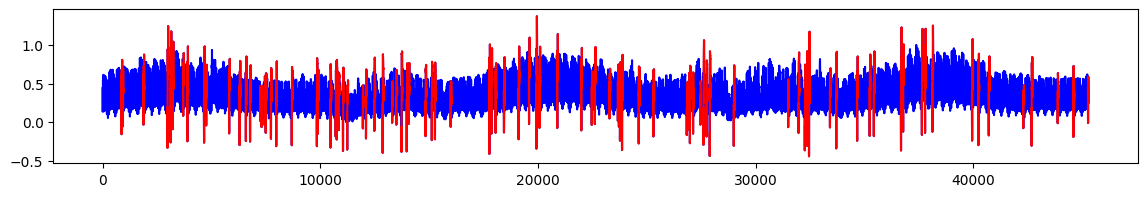

In [11]:
## Select File
data_name = 'elec'
dir = os.getcwd() + f'/data/synthetic/{data_name}'
# f = '0_ECG_Test_n_d_grad_p0_n8_b50.arff'
f = '0_elec_anomaly_scale_f_0_s_0.1_r_3_uniform.arff'

data, label = read_arff(f'{dir}/{f}')
data = data.reshape(-1)
label = label.reshape(-1)
plot_anomaly(data, label)

### AnDri (Off) (with parameters)

SW: 20
NM: 0, Tau: 0.6355273068189937, Nu: 0.8512095305042127, M: 0.28862125000623867, STD: 0.11563535227091834
NM: 1, Tau: 0.6071165433826484, Nu: 0.8407391885532655, M: 0.2840298665669389, STD: 0.10769555893856986
NM: 2, Tau: 0.6950724556991055, Nu: 0.8769941755520447, M: 0.3137291725717959, STD: 0.1271144277091032
NM: 3, Tau: 0.48420019822829347, Nu: 0.8629700379785009, M: 0.2124550033695194, STD: 0.09058173161959136
NM: 4, Tau: 0.5369700879573757, Nu: 0.8389211334624683, M: 0.22056954377212454, STD: 0.10546684806175036
NM: 5, Tau: 0.6532254178028476, Nu: 0.8757263399907576, M: 0.2981482037898509, STD: 0.11835907133766556
NM: 6, Tau: 0.6107926791327537, Nu: 0.8203760269071249, M: 0.272292009659284, STD: 0.11283355649115656
NM: 7, Tau: 0.5838215955121182, Nu: 0.8729646434491545, M: 0.2632416631451001, STD: 0.10685997745567268
NM: 8, Tau: 1.13133037459444, Nu: 0.9, M: 0.5364473936757919, STD: 0.19829432697288277
NM: 9, Tau: 1.8021272720056618, Nu: 0.9, M: 0.6658476234888895, STD: 0.37

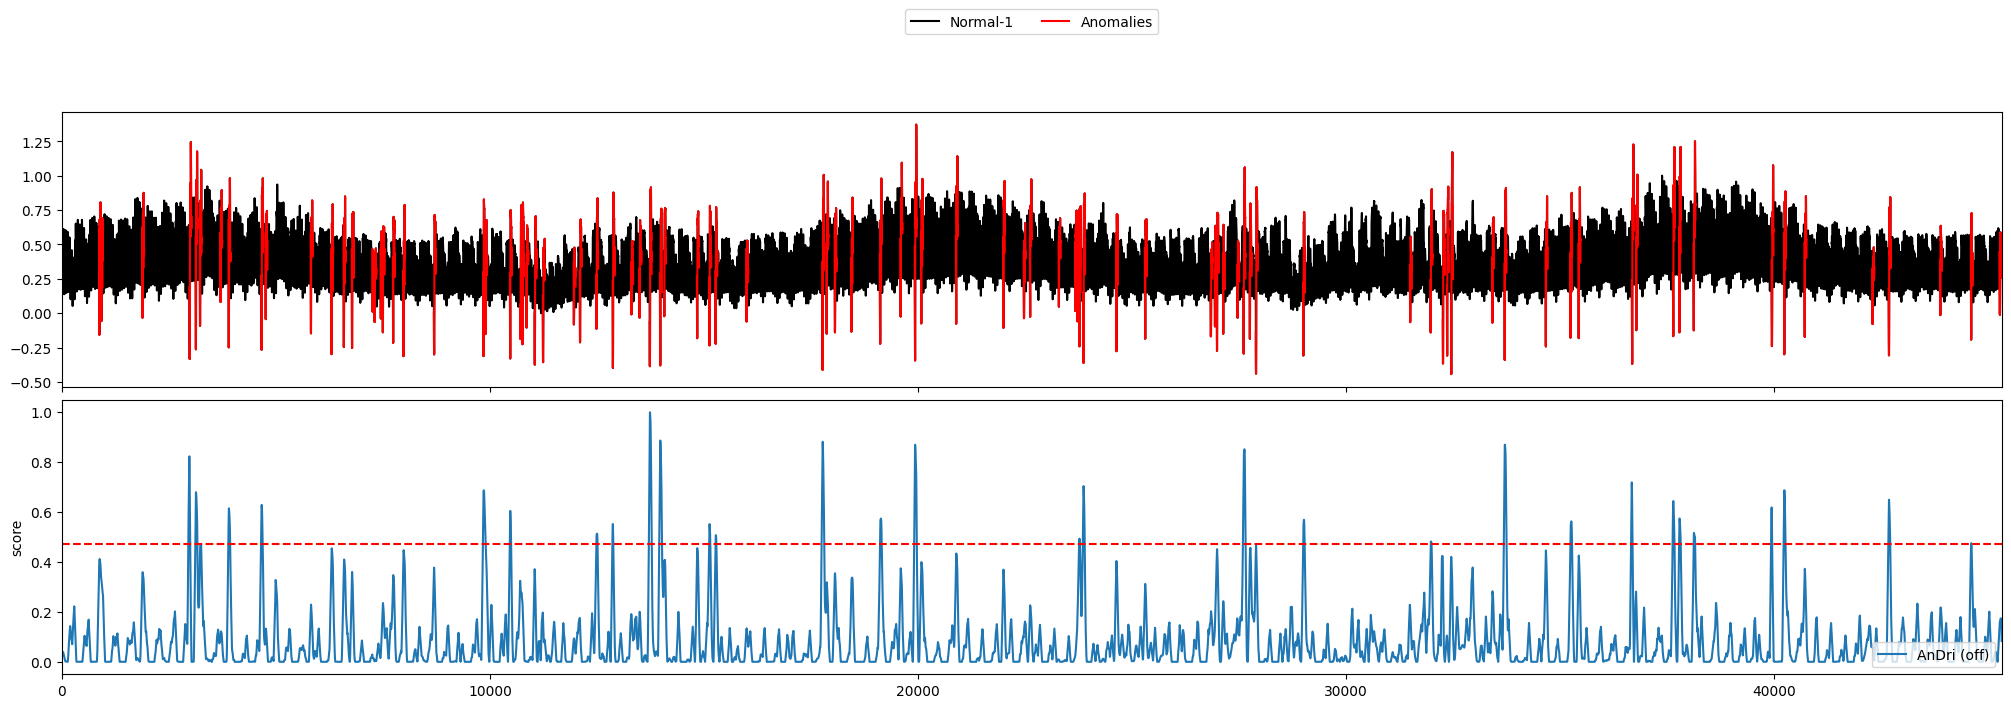

In [12]:
slidingWindow = find_length(data[:10000])
if data_name == 'elec': slidingWindow = 48
if data_name == 'weather': slidingWindow = 24

scores, slabels = [], []
normalize= 'zero-mean'  # default
kadj=1                  # default
nm_len=2                # default
overlap=0               # default
min_size = 0.01         # default for offline
max_W = 20
train_len = 0.2* len(data)
stepwise=True           # default

## Offline
modelName='AnDri (off)'
start_t = time.time()
clf = AnDri(pattern_length=slidingWindow, normalize=normalize, linkage_method='ward', th_reverse=5, kadj=kadj, nm_len=nm_len, overlap=overlap, max_W=max_W, eta=1)
x = data
clf.fit(x, y=label, online=False, training_len=int(train_len), stepwise=stepwise, min_size=min_size)

end_t = time.time()

print('AnDri (off): Done (takes)', end_t - start_t)
score = clf.scores

## For fair comparison (To be moved into a2d2.py)
score = MinMaxScaler(feature_range=(0,1)).fit_transform(score.reshape(-1,1)).ravel()
if len(score) < len(x):
    score = np.append(score, np.ones(len(x)-len(score))*np.mean(score))

scores.append(score)
slabels.append('AnDri (off)')

plotFigRev(data, label, scores, slabels, slidingWindow, plotRange=None, fname='temp.png')

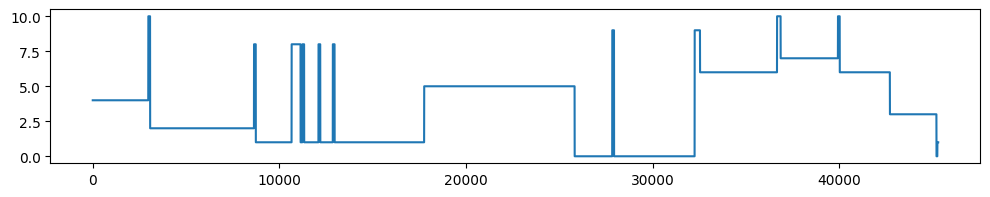

In [13]:
## Cluster info. (for each point)
plt.figure(figsize=(12,2))
# plt.plot(clf.cl_s[110000:130000])
plt.plot(clf.cl_s)

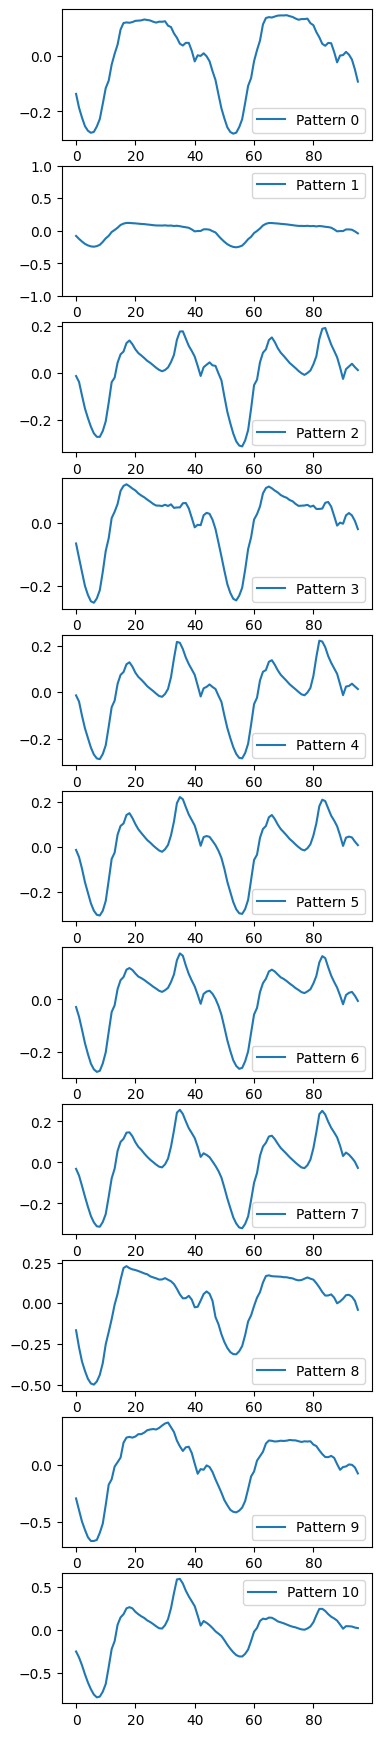

In [14]:
fig, ax = plt.subplots(len(clf.NMs),1, figsize=(4, 2*len(clf.NMs)))
for i, NM in enumerate(clf.NMs):
    ax[i].plot(NM.subseq, label=f'Pattern {i}')
    ax[i].legend()
    ax[1].set_ylim([-1,1])
    

SW: 20
NM: 0, Tau: 0.6309861529917763, Nu: 0.8611646650068877, M: 0.29254104546818765, STD: 0.11281503584119622
NM: 1, Tau: 0.5512492626027843, Nu: 0.8695098705362259, M: 0.24569876078542435, STD: 0.10185016727245333
NM: 2, Tau: 0.5041848628373746, Nu: 0.8187960181718499, M: 0.20776403023605372, STD: 0.09880694420044031
NM: 3, Tau: 0.2656772351378074, Nu: 0.663526017393762, M: 0.14298234852075076, STD: 0.04089829553901887
NM: 4, Tau: 0.9840723409705816, Nu: 0.6256500899110727, M: 0.566331122151381, STD: 0.1392470729397335
START: 5, 189
[<-- Inactive]: NM 1 = 0.8542731126938882/0.8695098705362259, at 10742
[10742], NM 4, tau: 0.98 (M: 0.566331122151381, STD: 0.1392470729397335) vs. 4.459975643583975, (M: 1.1149939108959936, STD: 1.1149939108959936)
[--> Active]: NM 1 = 0.9157108924908239/0.8695098705362259, at 11750
[18038], NM 4, tau: 0.98 (M: 0.566331122151381, STD: 0.1392470729397335) vs. 3.9777091175648374, (M: 0.9944272793912093, STD: 0.9944272793912093)
SW: 20
[19094], NM 4, tau: 

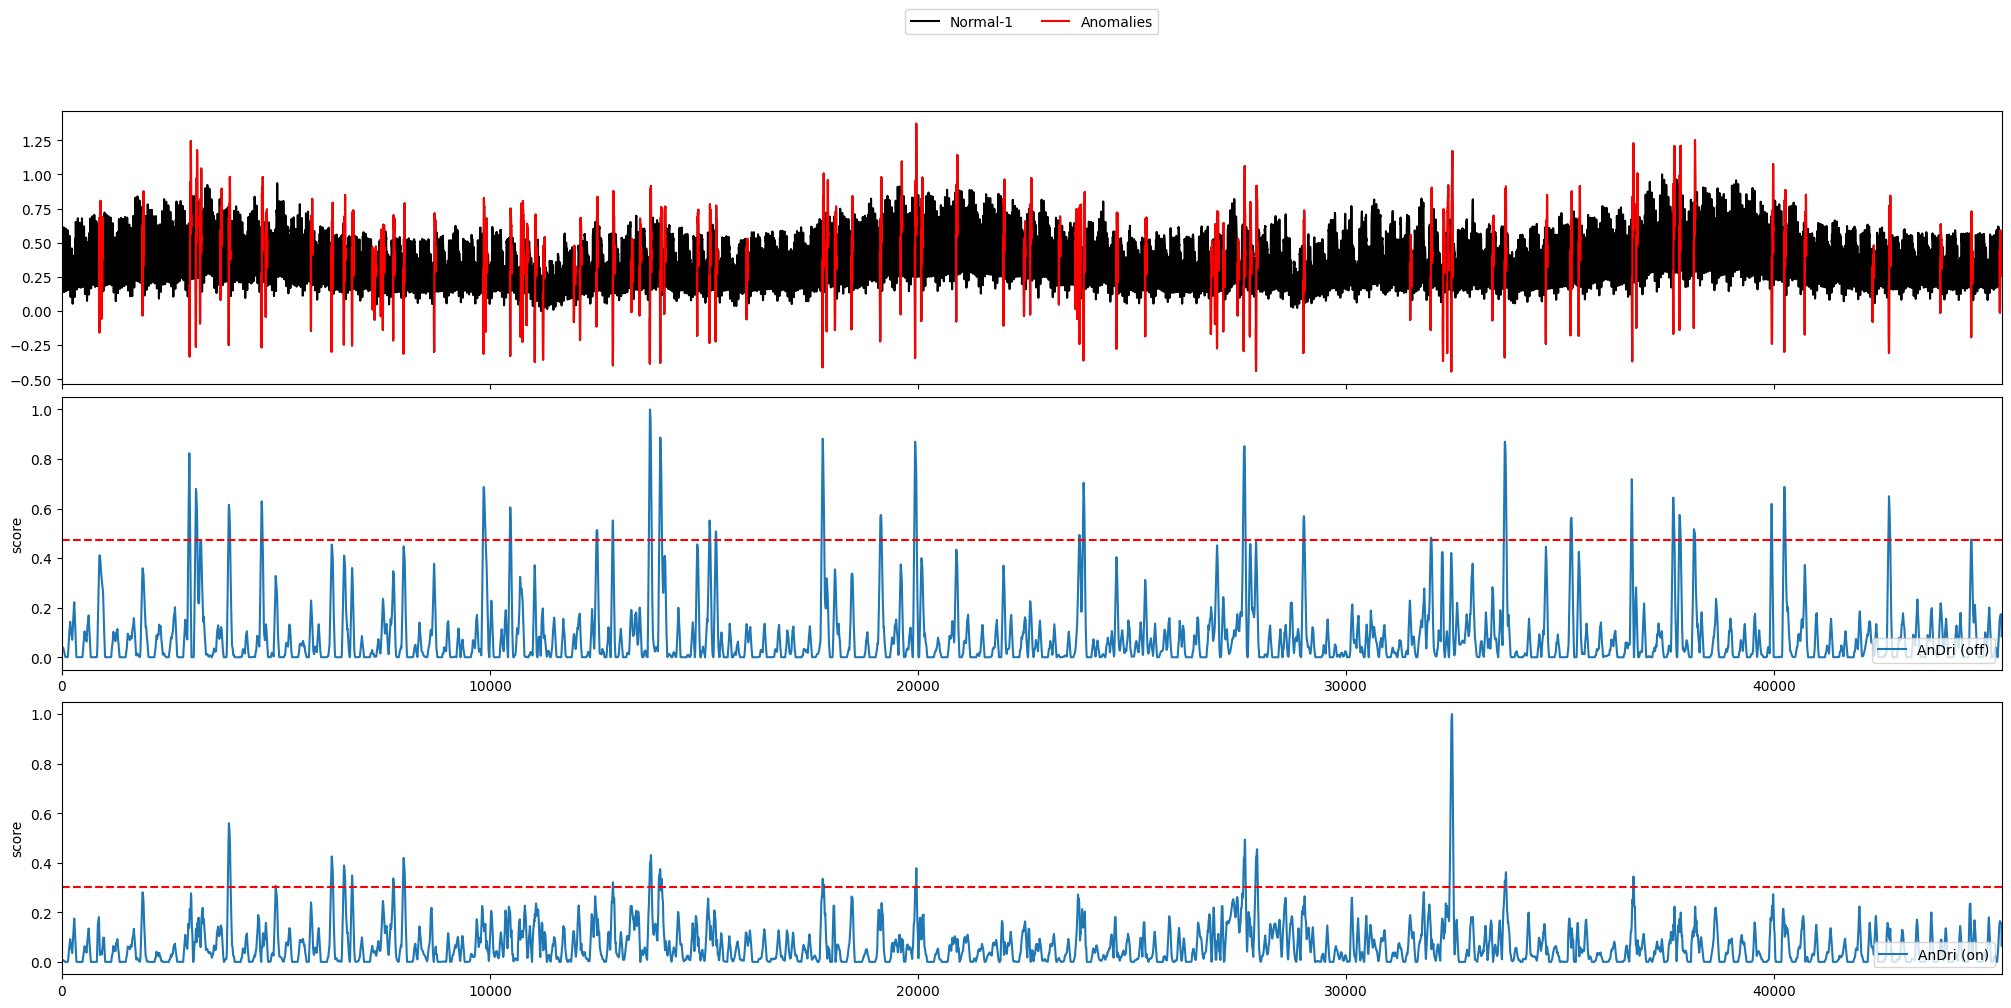

In [15]:
min_on = 0.025  ## for online
delta = max_W*slidingWindow

modelName='AnDri (on)'
start_t = time.time()
clf = AnDri(pattern_length=slidingWindow, normalize=normalize, linkage_method='ward', th_reverse=5, kadj=kadj, nm_len=nm_len, overlap=overlap, max_W=max_W, eta=1, REVISE_SCORE=True)
x = data

clf.fit(x, y=label, online=True, training_len=int(train_len),  delta=delta, stepwise=stepwise, min_size=min_on)
end_t = time.time()
if len(clf.scores) ==0 :
    num_min_cl_on = 0
    scores.append(np.zeros(len(x)))
else:
    num_min_cl_on = len(clf.listcluster[clf.listcluster == -1])
    score = clf.scores
    score = MinMaxScaler(feature_range=(0,1)).fit_transform(score.reshape(-1,1)).ravel()
    if len(score) < len(x):
        score = np.append(score, np.ones(len(x)-len(score))*np.mean(score))
    scores.append(score[:len(x)])
slabels.append('AnDri (on)')

print('AnDri (on) -Done (takes)', end_t - start_t)
plotFigRev(data, label, scores, slabels, slidingWindow, plotRange=None, fname='temp.png')